# Predicting Customer Churn in a Telecom Company:
A telecom company is facing a high customer churn rate and wants to reduce it.
Customer churn refers to the process where a customer stops doing business with a
company. In the telecom industry, customer churn is a major problem as acquiring newcustomers is more expensive than retaining existing customers. The company wants to use machine learning to predict which customers are likely to churn so that they cantake proactive measures to retain them. 


# OBJECTIVE

To predict the likelihood of customer churn.

# Exploratory Data Analysis

Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("train (2).csv")     #reading dataset

In [4]:
df.shape               #checking no. of rows and columns

(7043, 21)

In [5]:
df.head()        # checking top 5 rows of dataframe

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
df.loc[df['TotalCharges'].isnull() == True]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [9]:
#Removing missing values 
df.dropna(how = 'any', inplace = True)

In [10]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
# Checking for data imbalance
# Count the number of samples in each class
class_counts = df['Churn'].value_counts()

# Print the class counts
print(class_counts)

No     5163
Yes    1869
Name: Churn, dtype: int64


In [12]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [15]:
df=df.drop('customerID',axis=1)     #droping customerID as it's unique for every rows

In [16]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Label Encoding

In [17]:
for col in df.columns:
    print(f"Column: {col}\nUnique Values: {df[col].unique()}\n")

Column: gender
Unique Values: ['Female' 'Male']

Column: SeniorCitizen
Unique Values: [0 1]

Column: Partner
Unique Values: ['Yes' 'No']

Column: Dependents
Unique Values: ['No' 'Yes']

Column: tenure
Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]

Column: PhoneService
Unique Values: ['No' 'Yes']

Column: MultipleLines
Unique Values: ['No phone service' 'No' 'Yes']

Column: InternetService
Unique Values: ['DSL' 'Fiber optic' 'No']

Column: OnlineSecurity
Unique Values: ['No' 'Yes' 'No internet service']

Column: OnlineBackup
Unique Values: ['Yes' 'No' 'No internet service']

Column: DeviceProtection
Unique Values: ['No' 'Yes' 'No internet service']

Column: TechSupport
Unique Values: ['No' 'Yes' 'No internet service']

Column: StreamingTV
Unique Values: ['No' 'Yes' 'No internet service']

Column: Stre

In [18]:
from sklearn.preprocessing import LabelEncoder
# create an instance of LabelEncoder
le = LabelEncoder()
# encode multiple column
df["MultipleLines"]= le.fit_transform(df["MultipleLines"])
df["InternetService"]= le.fit_transform(df["InternetService"])
df["OnlineSecurity"]= le.fit_transform(df["OnlineSecurity"])
df["OnlineBackup"]= le.fit_transform(df["OnlineBackup"])
df["DeviceProtection"]= le.fit_transform(df["DeviceProtection"])
df["TechSupport"]= le.fit_transform(df["TechSupport"])
df["StreamingTV"]= le.fit_transform(df["StreamingTV"])
df["StreamingMovies"]= le.fit_transform(df["StreamingMovies"])
df["Contract"]= le.fit_transform(df["Contract"])
df["PaymentMethod"]= le.fit_transform(df["PaymentMethod"])

In [19]:
# replace column values with 0 and 1
df['Churn'] = df['Churn'].replace({'No': 0, 'Yes': 1})
df['gender'] = df['gender'].replace({'Female': 0, 'Male': 1})
df['Partner'] = df['Partner'].replace({'No': 0, 'Yes': 1})
df['Dependents'] = df['Dependents'].replace({'No': 0, 'Yes': 1})
df['PhoneService'] = df['PhoneService'].replace({'No': 0, 'Yes': 1})
df['PaperlessBilling'] = df['PaperlessBilling'].replace({'No': 0, 'Yes': 1})

In [20]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [21]:
# create a StandardScaler object
scaler = StandardScaler()

# fit the scaler to the data and transform the data
scaled_df = scaler.fit_transform(df)

print(scaled_df)

[[-1.00943013 -0.44032709  1.03561683 ... -1.16169394 -0.99419409
  -0.60166339]
 [ 0.99065797 -0.44032709 -0.9656081  ... -0.26087792 -0.17373982
  -0.60166339]
 [ 0.99065797 -0.44032709 -0.9656081  ... -0.36392329 -0.95964911
   1.66205891]
 ...
 [-1.00943013 -0.44032709  1.03561683 ... -1.17000405 -0.85451414
  -0.60166339]
 [ 0.99065797  2.27103902  1.03561683 ...  0.31916782 -0.87209546
   1.66205891]
 [ 0.99065797 -0.44032709 -0.9656081  ...  1.35793167  2.01234407
  -0.60166339]]


# Data Visualization

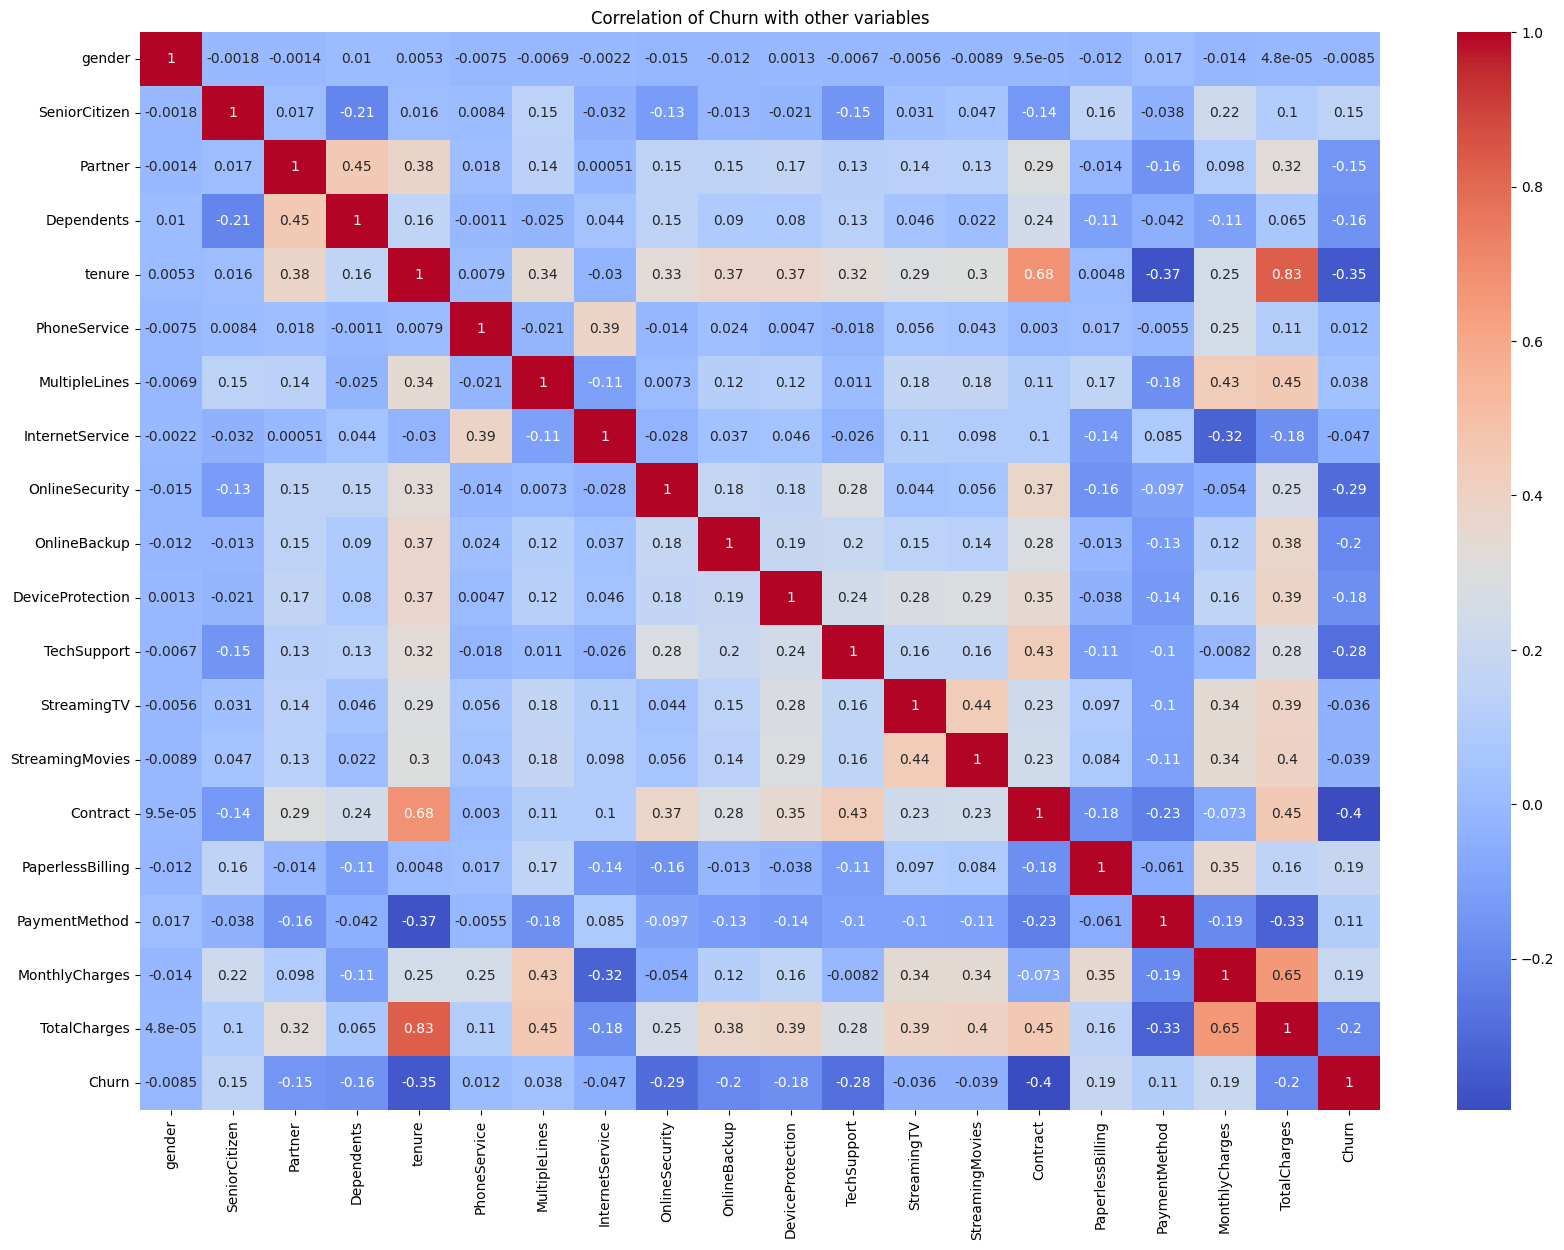

In [22]:
# create a correlation matrix
corr_matrix = df.corr()

# plot the heatmap
plt.figure(figsize=(20, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation of Churn with other variables')
plt.show()

<Axes: xlabel='gender', ylabel='count'>

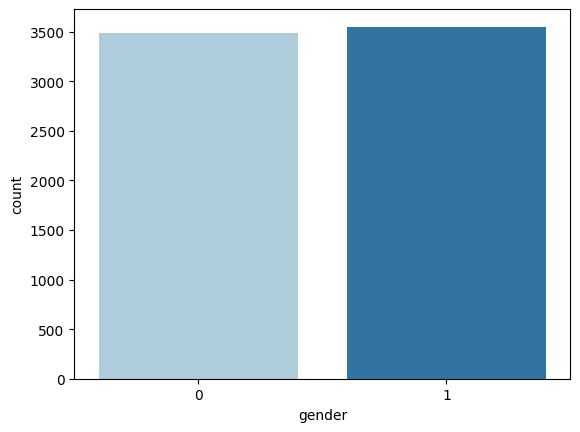

In [23]:
sns.countplot(x='gender', data=df, palette='Paired')

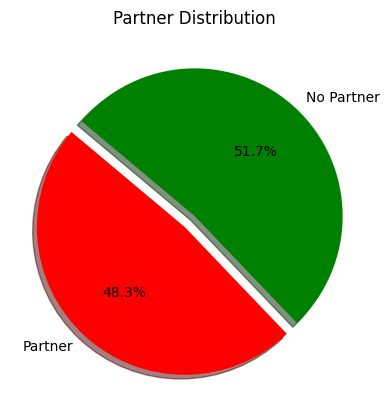

In [24]:
# Get the count of partner
Partner_count = df[df['Partner'] == 1]['Partner'].count()

# Get the count of no_partner_count
No_partner_count = df[df['Partner'] == 0]['Partner'].count()

# Create a list of values
values = [Partner_count, No_partner_count]

colors = [ 'red', 'green']

# Create a list of labels
labels = ['Partner', 'No Partner']

# Set the explode parameter to highlight the Senior Citizens slice
explode = (0.1, 0)

# Create a pie chart
plt.pie(values, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, colors=colors,startangle=140)

# Add a title to the chart
plt.title('Partner Distribution')

# Show the chart
plt.show()

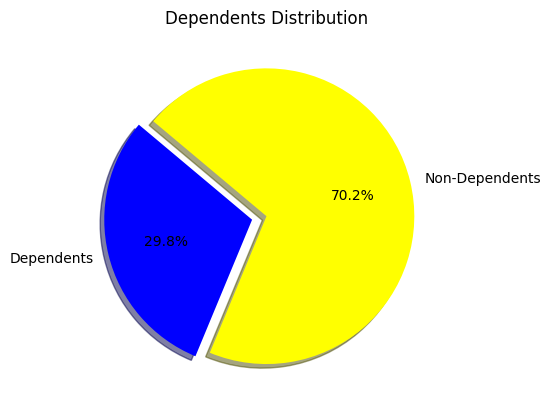

In [25]:
# Get the count of senior citizens
Dependents_count = df[df['Dependents'] == 1]['Dependents'].count()

# Get the count of non-senior citizens
non_dependents_count = df[df['Dependents'] == 0]['Dependents'].count()

# Create a list of values
values = [Dependents_count, non_dependents_count]

colors = [ 'blue', 'yellow']

# Create a list of labels
labels = ['Dependents', 'Non-Dependents']

# Set the explode parameter to highlight the Senior Citizens slice
explode = (0.1, 0)

# Create a pie chart
plt.pie(values, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, colors=colors,startangle=140)

# Add a title to the chart
plt.title('Dependents Distribution')

# Show the chart
plt.show()

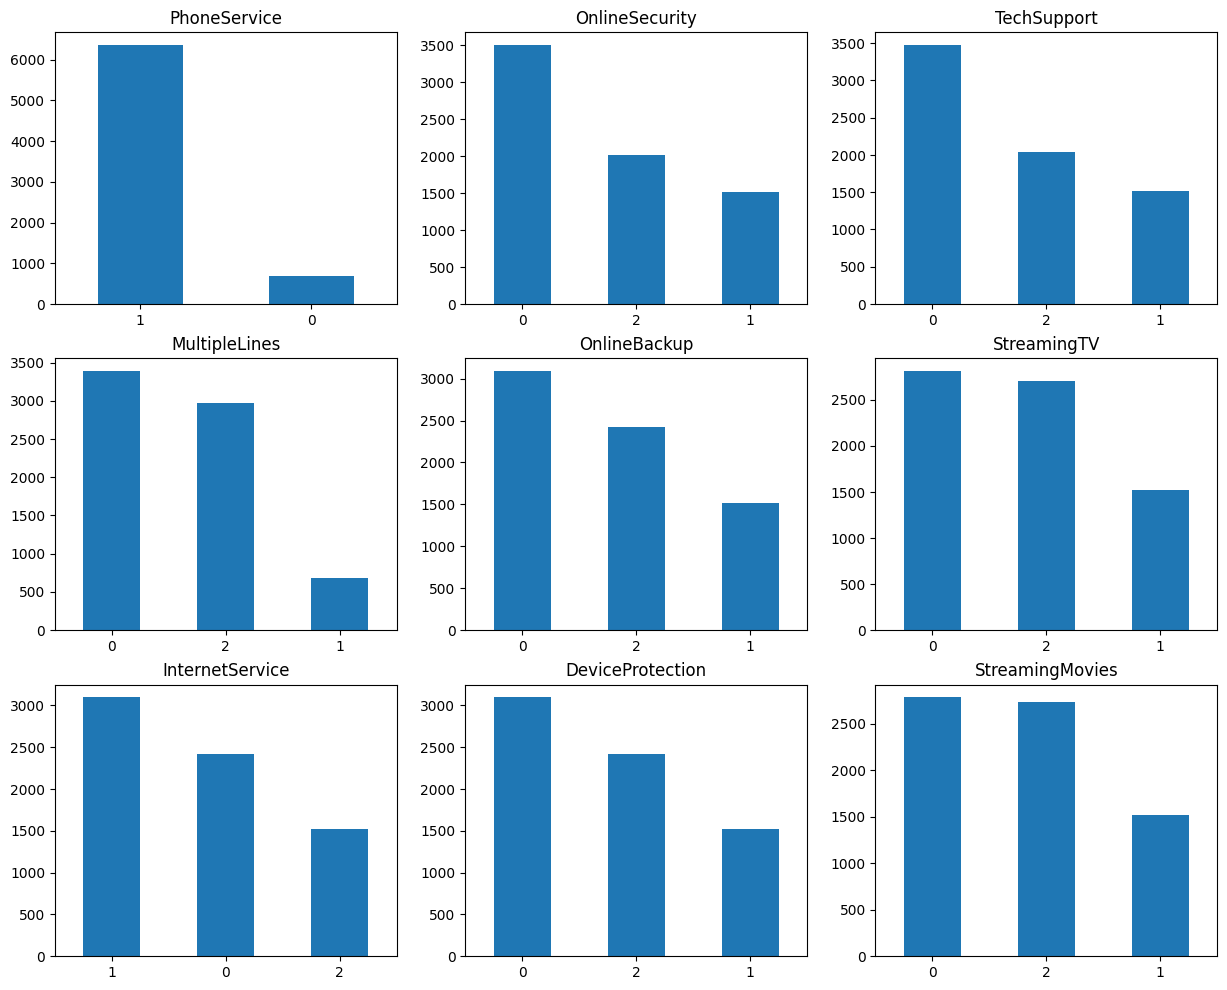

In [26]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3, figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

Text(0.5, 1.0, 'Churn by Contract Type')

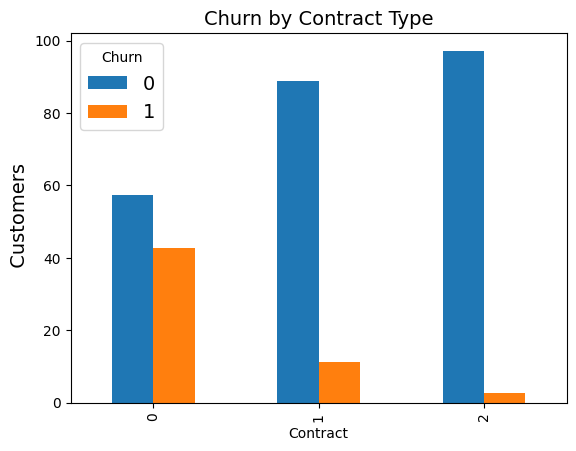

In [27]:
contract_churn = df.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar')
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel(' Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

Text(0.5, 1.0, 'Churn by Seniority Level')

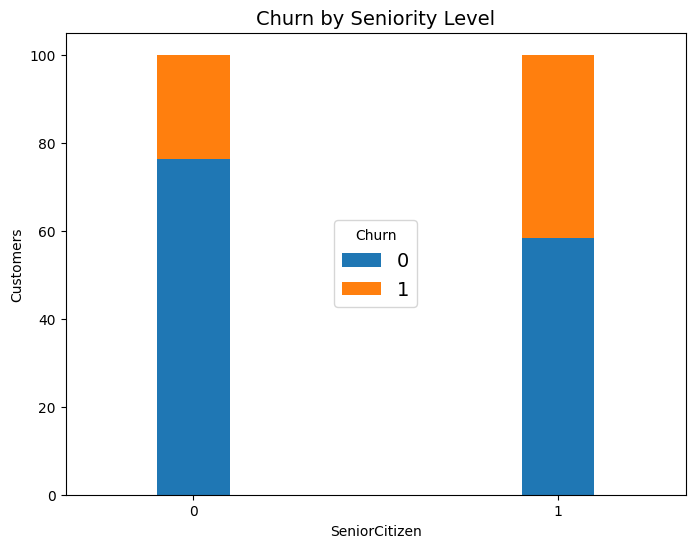

In [28]:
seniority_churn = df.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6))
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('Customers')
ax.set_title('Churn by Seniority Level',size = 14)

# EDA on Test data

In [29]:
df_test= pd.read_csv("test (2).csv")     #reading dataset

In [30]:
df_test.shape               #checking no. of rows and columns

(20, 19)

In [31]:
df_test.head()        # checking top 5 rows of dataframe

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Male,0,No,No,25,Yes,No,Fiber optic,Yes,no,yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,106.00,2787.00
1,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,30.00,30.00
2,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
3,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
4,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85


In [32]:
df_test.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [33]:
df_test.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [34]:
from sklearn.preprocessing import LabelEncoder
# create an instance of LabelEncoder
le = LabelEncoder()
# encode multiple column
df_test["MultipleLines"]= le.fit_transform(df_test["MultipleLines"])
df_test["gender"]= le.fit_transform(df_test["gender"])
df_test["InternetService"]= le.fit_transform(df_test["InternetService"])
df_test["OnlineSecurity"]= le.fit_transform(df_test["OnlineSecurity"])
df_test["OnlineBackup"]= le.fit_transform(df_test["OnlineBackup"])
df_test["DeviceProtection"]= le.fit_transform(df_test["DeviceProtection"])
df_test["TechSupport"]= le.fit_transform(df_test["TechSupport"])
df_test["StreamingTV"]= le.fit_transform(df_test["StreamingTV"])
df_test["StreamingMovies"]= le.fit_transform(df_test["StreamingMovies"])
df_test["Contract"]= le.fit_transform(df_test["Contract"])
df_test["PaymentMethod"]= le.fit_transform(df_test["PaymentMethod"])

In [35]:
# replace column values with 0 and 1
df_test['Partner'] = df_test['Partner'].replace({'No': 0, 'Yes': 1})
df_test['Dependents'] = df_test['Dependents'].replace({'No': 0, 'Yes': 1})
df_test['PhoneService'] = df_test['PhoneService'].replace({'No': 0, 'Yes': 1})
df_test['PaperlessBilling'] = df_test['PaperlessBilling'].replace({'No': 0, 'Yes': 1})

In [36]:
df_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,0,0,25,1,0,1,2,3,3,2,2,2,0,1,2,106.00,2787.00
1,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,30.00,30.00
2,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
3,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
4,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85


In [37]:
# create a StandardScaler object
scaler = StandardScaler()

# fit the scaler to the data and transform the data
scaled_df_test = scaler.fit_transform(df_test)

print(scaled_df_test)

[[ 0.81649658  0.         -0.73379939 -0.42008403  0.18747457  0.65465367
  -0.98473193  0.76337004  1.07869754  1.66978662  1.74587978  1.6771133
   1.1941005   1.32686223 -0.53881591  0.65465367  0.26537245  1.26169576
   0.65337742]
 [-1.22474487  0.          1.36277029 -0.42008403 -1.06235592 -1.52752523
   0.24618298 -0.93300782 -0.97596444  0.76719926 -0.94008911 -0.63614643
  -0.88259602 -0.79611734 -0.53881591  0.65465367  0.26537245 -1.11546886
  -0.97439079]
 [-1.22474487  0.          1.36277029 -0.42008403 -1.06235592 -1.52752523
   0.24618298 -0.93300782 -0.97596444  0.76719926 -0.94008911 -0.63614643
  -0.88259602 -0.79611734 -0.53881591  0.65465367  0.26537245 -1.12016063
  -0.97447935]
 [-1.22474487  0.          1.36277029 -0.42008403 -1.06235592 -1.52752523
   0.24618298 -0.93300782 -0.97596444  0.76719926 -0.94008911 -0.63614643
  -0.88259602 -0.79611734 -0.53881591  0.65465367  0.26537245 -1.12016063
  -0.97447935]
 [-1.22474487  0.          1.36277029 -0.42008403 -1.

# Train test split

In [38]:
y = df['Churn'].values
X = df.drop(columns = ['Churn'])

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Model Building



# Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
# Create a decision tree classifier
Dt = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
Dt.fit(X_train, y_train)

# Predict the target variable for the testing data
y_pred = Dt.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score
# Compute the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7175355450236967


In [42]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE to the training data only
sm = SMOTE(random_state=10)
X_train_res1, y_train_res1 = sm.fit_resample(X, y)

In [44]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train_res1, y_train_res1, test_size=0.3, random_state=1)

In [45]:
from sklearn.tree import DecisionTreeClassifier
# Create a decision tree classifier
Dt_smote = DecisionTreeClassifier(random_state=100, max_depth=5,min_samples_leaf=7,criterion='gini')

# Fit the model on the training data
Dt_smote.fit(X_train_res1, y_train_res1)

# Predict the target variable for the testing data
y_pred_res1= Dt_smote.predict(X_test1)

In [46]:
# Compute the accuracy of the classifier
accuracy_Dtsmote = accuracy_score(y_test1, y_pred_res1)
print('Accuracy:', accuracy_Dtsmote)

Accuracy: 0.8089089735313105


# Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier

Rfc = RandomForestClassifier()
Rfc.fit(X_train, y_train)

y_pred = Rfc.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score
# Compute the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7838862559241706


In [49]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE to the training data only
sm = SMOTE(random_state=10)
X_train_res2, y_train_res2 = sm.fit_resample(X, y)

In [50]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train_res2, y_train_res2, test_size=0.3, random_state=1)

In [51]:
from sklearn.ensemble import RandomForestClassifier

Rfc_smote= RandomForestClassifier(random_state=100, max_depth=6,min_samples_leaf=8,criterion='gini', n_estimators=100)
Rfc_smote.fit(X_train_res2, y_train_res2)

y_pred_res2 = Rfc_smote.predict(X_test2)

In [52]:
# Compute the accuracy of the classifier
accuracy_Rfcsmote = accuracy_score(y_test2, y_pred_res2)
print('Accuracy:', accuracy_Rfcsmote)

Accuracy: 0.8256939961265333


# Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression
# Define a logistic regression model
Lr = LogisticRegression()

# Train the model on the training set
Lr.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = Lr.predict(X_test)



In [54]:
from sklearn.metrics import accuracy_score
# Compute the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7971563981042654


In [55]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE to the training data only
sm = SMOTE(random_state=10)
X_train_res3, y_train_res3 = sm.fit_resample(X, y)

In [56]:
from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_train_res3, y_train_res3, test_size=0.3, random_state=1)

In [57]:
from sklearn.linear_model import LogisticRegression
# Define a logistic regression model
Lr_smote = LogisticRegression()

# Train the model on the training set
Lr_smote.fit(X_train_res3, y_train_res3)

# Make predictions on the testing set
y_pred_res3 = Lr_smote.predict(X_test3)



In [58]:
# Compute the accuracy of the classifier
accuracy_Lrsmote = accuracy_score(y_test3, y_pred_res3)
print('Accuracy:', accuracy_Lrsmote)

Accuracy: 0.8014848289218851


# Support Vector Machine

In [59]:
from sklearn.svm import SVC
# Define a SVM model
Svm= SVC(kernel='linear')

# Train the model on the training set
Svm.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = Svm.predict(X_test)

In [60]:
from sklearn.metrics import accuracy_score
# Compute the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7900473933649289


In [61]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE to the training data only
sm = SMOTE(random_state=10)
X_train_res4, y_train_res4 = sm.fit_resample(X, y)

In [62]:
from sklearn.model_selection import train_test_split
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_train_res4, y_train_res4, test_size=0.3, random_state=1)

In [63]:
from sklearn.svm import SVC
# Define a SVM model
Svm_smote= SVC(kernel='linear')

# Train the model on the training set
Svm_smote.fit(X_train_res4, y_train_res4)

# Make predictions on the testing set
y_pred_res4 = Svm_smote.predict(X_test4)

In [64]:
# Compute the accuracy of the classifier
accuracy_Svmsmote= accuracy_score(y_test4, y_pred_res4)
print('Accuracy:', accuracy_Svmsmote)

Accuracy: 0.8014848289218851


# KNN

In [65]:
from sklearn.neighbors import KNeighborsClassifier
# Define a KNN model
Knn= KNeighborsClassifier(n_neighbors=3)

# Train the model on the training set
Knn.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = Knn.predict(X_test)

In [66]:
# Compute the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.762085308056872


In [67]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE to the training data only
sm = SMOTE(random_state=10)
X_train_res5, y_train_res5 = sm.fit_resample(X, y)

In [68]:
from sklearn.model_selection import train_test_split
X_train5, X_test5, y_train5, y_test5 = train_test_split(X_train_res5, y_train_res5, test_size=0.3, random_state=1)

In [69]:
from sklearn.neighbors import KNeighborsClassifier
# Define a KNN model
Knn_smote= KNeighborsClassifier(n_neighbors=3)

# Train the model on the training set
Knn_smote.fit(X_train5, y_train5)

# Make predictions on the testing set
y_pred_res5 = Knn_smote.predict(X_test5)

In [70]:
# Compute the accuracy of the classifier
accuracy_Knnsmote= accuracy_score(y_test5, y_pred_res5)
print('Accuracy:', accuracy_Knnsmote)

Accuracy: 0.7685603615235636


# Hyperparameter Tuning

In [71]:
from sklearn.model_selection import RandomizedSearchCV

#Define parameter grid for RandomizedSearch and instanciate and train model.
param_grid_rf = {'n_estimators': np.arange(10, 2000, 10), 
                 'max_features': ['auto', 'sqrt'],
                 'max_depth': np.arange(10, 200, 10),
                 'criterion': ['gini', 'entropy'],
                 'bootstrap': [True, False]}

rf = RandomForestClassifier()
rf_random_grid = RandomizedSearchCV(estimator=rf, param_distributions=param_grid_rf, cv=5, verbose=0)
rf_random_grid.fit(X_train, y_train)

# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_rf_tuned = rf_random_grid.predict(X_test)
y_pred_rf_tuned_prob = rf_random_grid.predict_proba(X_test)

print('Random Forest - Best Parameters: ', rf_random_grid.best_params_)

Random Forest - Best Parameters:  {'n_estimators': 1310, 'max_features': 'sqrt', 'max_depth': 130, 'criterion': 'entropy', 'bootstrap': True}


# Pickling the model

In [72]:
import pickle
filename = 'Model_Rfc.pkl'

In [73]:
pickle.dump(Rfc_smote, open(filename, 'wb'))

In [74]:
load_model = pickle.load(open(filename, 'rb'))

In [75]:
accuracy_Rfcsmote = load_model.score(X_train_res2, y_train_res2)

In [76]:
accuracy_Rfcsmote

0.825585899670734

Out of all the models Random forest model is giving the best score,hence Model_Rfc.pkl is  ready and dumped in , which we will use and prepare API's so that we can access our model from UI.